In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def H(P):
    return -np.sum(P.flat * np.log(P.flat))

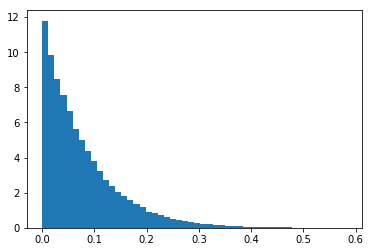

In [6]:
N_i, N_j = 2, 3

mutual_info = []
for _ in range(100000):
    P_ij = np.random.rand(N_i, N_j)
    P_ij /= np.sum(P_ij)

    P_j = np.sum(P_ij, axis=0)
    P_i = np.sum(P_ij, axis=1)

    I_ij = H(P_i) + H(P_j) - H(P_ij)
    mutual_info.append(I_ij)
#    mutual_info.append(H(P_j))

plt.hist(mutual_info, bins=50, normed=True);

In [61]:
data_k2 = [
    [0.716428768821, 0.655303351725, 0.670158971585, 0.657044098189, 0.747265116832,
     0.638678634738, 0.703396980854, 0.644640706100, 0.682657740118, 0.568404667696],
    [0.855936629631, 0.794043221388, 0.838260083114, 0.788722506317, 0.856942880910,
     0.902072488602, 0.786249777653, 0.827157835168, 0.869567182709, 0.783186999836],
    [0.903121749737, 1.021222796850, 1.058302549490, 1.006876679980, 0.995996427525,
     0.971570054558, 0.985099743508, 1.033489831140, 0.966914325273, 0.969239730054],
    [1.186972358810, 1.207018658210, 1.172549479490, 1.153240911800, 1.157918752630,
     1.135321915110, 1.177938870630, 1.192099584020, 1.151417640750, 1.170897785950],
    [1.398307861800, 1.336467742290, 1.329358443920, ],
]

x_k2 = [1000, 2000, 4000, 8000, 16000]
y_k2, yerr_k2 = np.asarray([(np.mean(row), np.std(row)) for row in data_k2]).T

In [31]:
data16k = [
    1.24777168640,
    1.27229745869,
    1.20679011314,
    1.22132402868,
    1.22553436708,
    1.20933303881,
    1.24095631393,
    1.21863443051,
    1.21352551424,
    1.25527362911,
]
print(np.mean(data16k), np.std(data16k))

1.2311440580590003 0.02076592796752455


Text(0.5,1,'MNIST I(top, bottom)')

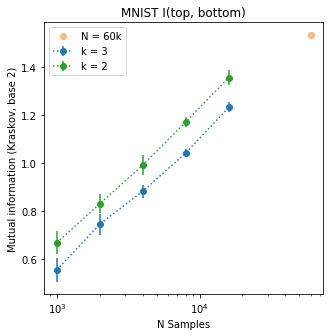

In [62]:
mutual_info = np.asarray([
    (1000, 0.555845545710, 0.0498960167255),
    (2000, 0.744989032051, 0.0437560021493),
    (4000, 0.882319825983, 0.0271405196468),
    (8000, 1.041177594930, 0.0154471390138),
    (16000,1.231144058059, 0.0207659279675),
])
N_samples, y, yerr = mutual_info.T

fig = plt.figure(figsize=(5, 5))
plt.errorbar(N_samples, y, yerr, fmt='o:', label='k = 3')
plt.gca().set_xscale('log')

slope, intercept = np.polyfit(np.log(N_samples), y, 1)
xx = np.array([60000])
fit = intercept + slope * np.log(xx)
plt.plot(xx, fit, "o", alpha=0.5, label='N = 60k')

plt.errorbar(x_k2, y_k2, yerr_k2, fmt='o:', label='k = 2')

plt.legend()
plt.xlabel("N Samples")
plt.ylabel("Mutual information (Kraskov, base 2)")
plt.title("MNIST I(top, bottom)")

In [63]:
from collections import defaultdict

class LogFileMNIST(object):
    def __init__(self, path):
        self.path = path
        with open(path, 'r') as f:
            lines = [line.split() for line in f.readlines()]
        self.samples = defaultdict(list)
        for n, mi in [x[3:] for x in lines if x[2] == 'X:']:
            self.samples[n].append(mi)
        self.n = [int(x[3][:-1]) for x in lines if x[2] == 'MI']
        self.mi = np.array([[float(e) for e in x[4:]] for x in lines if x[2] == 'MI'])

In [ ]:
LogFileMNIST("log.gray")